# Pandas?

Think of the capabilities of [R](https://www.r-project.org/about.html), but using the Python programming language.

It is open source, fast, flexible, easy to learn and easy to use and has become popular in the field of data analysis.


# 1. Numpy

Pandas is a high level library built on top of [Numpy](http://www.numpy.org), a fundamental package for scientific computing with Python that enables powerful and fast array operations, amongst many other functions.

## Arrays

We already have native Python list and why do we still need numpy? Numpy is feature rich and much, much fast. `a` is a numpy arrange and `b` is a native Python list. The following example shows there is a signifcant performance advantage.

`%%timeit` is a [magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html) for IPython (Interactive Python)

In [1]:
import numpy as np
from numpy.random import random

In [2]:
# get the same data in two data types
a = random(1000)
b = list(a)
print('a:', type(a), 'b:', type(b))

a: <class 'numpy.ndarray'> b: <class 'list'>


In [3]:
%%timeit 
a.sum()

2.69 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
%%timeit
b = list(a)
b_sum = 0
while b:
    b_sum += b.pop()
b_sum

173 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For example, a common task is to convert a raster image to an numpy array so that it could be manipulated outside/bypassing a GIS, enabling more flexible and fast way to produce statistics. 

Imagine the following hypothetical array of values representing a 100 by 10 image (each pixel 30m x 30m resolution) of percentage tree cover, i.e. a pixel value of 0.43 suggest this pixel has 43% forest cover. The questions are:

- considering the definition of a forest pixel being more than 25% (FAO definition), what is the total size of forest in the image.
- what if the definition threshold has been reduced to 10%?

In [5]:
# hypothetical image
forest_cover = random(1000).reshape(100,10)

In [6]:
forest_cover

array([[8.36204728e-01, 9.91907195e-01, 1.40453520e-01, 5.65014457e-01,
        5.67709238e-01, 2.96724418e-01, 9.64913010e-01, 5.77907070e-01,
        3.48035051e-01, 3.24866906e-02],
       [5.56528062e-01, 9.39697451e-01, 3.31770063e-01, 8.22352894e-01,
        9.97943637e-01, 8.44858645e-01, 4.87985173e-01, 6.46556964e-01,
        1.42757186e-01, 6.26104873e-01],
       [7.83884639e-01, 6.92142746e-01, 3.66516693e-01, 8.73736862e-01,
        7.71998252e-02, 4.37226184e-01, 1.23277010e-01, 2.95274990e-01,
        9.84565030e-01, 8.84997852e-01],
       [9.57705474e-01, 2.94724493e-01, 8.63661765e-01, 1.11277215e-02,
        9.48403773e-02, 6.05013333e-01, 1.25898280e-01, 5.71117225e-01,
        6.54051755e-01, 8.95158541e-01],
       [7.72566035e-01, 6.52806029e-01, 5.24489892e-01, 5.45061395e-01,
        7.11596512e-01, 2.36153646e-01, 7.05689132e-01, 3.56501173e-01,
        6.89903478e-01, 9.41739559e-01],
       [7.18852535e-02, 2.09867844e-01, 4.58865039e-01, 9.61930586e-02,
   

Check if the number of pixels is 1000

In [7]:
forest_cover.size

1000

The traditional way would be (probably using a loop) to find those pixel value >25%. This is hugely inefficient, and in fact, hugely easy using a boolen index itself.

First let's see an trivial example

In [8]:
# booleans arrays value treated: True -> 1, False -> 0
np.array([True, False, True]).sum()

2

Let's find all pixels that have values greater than 25%. The result is a matrix of boolean values

In [9]:
forest_cover>0.25

array([[ True,  True, False,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True,  True, False,  True, False,  True,  True,
         True],
       [ True,  True,  True, False, False,  True, False,  True,  True,
         True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True],
       [False, False,  True, False,  True, False,  True,  True, False,
         True],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True, False,  True,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True, False, False, False, False,  True,
         True],
       [ True, False,  True,  True,  True, 

Find the number of pixels > 25%

In [10]:
(forest_cover>0.25).sum()

777

By multiplying the the number of forest cell with cell size, the total area of forest can be easily calculated.

The total area of forest cover in square kilometers

In [11]:
(forest_cover>0.25).sum() * 900 / 1000000.0

0.6993

# 2. Pandas

Unlike numpy, Pandas contains higher-level data structures and manipulation tools designed to make data analysis fast and easy in Python, including: data I/O, cleaning, manipulation, visualisation and much more.

In [12]:
#!pip install pandas

In [13]:
%matplotlib inline
import pandas as pd

## Load data and export result

Pandas includes handy functions to handle common data formats. In this section, we will be using data on protected areas and biogeographical classifications in a CSV table. For each ecoregion, its higher classes of biome and realm are given, so are the size of ecoregions and how much of them are covered by protected areas.


In [14]:
ecoregion = pd.read_csv('ecoregion.csv')

Pandas dataframe is very similar to dataframe in R 

In [15]:
ecoregion.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%,NaN,All 4 Antarctic ecoregions were excluded from ...,NaN,NaN,NaN,NaN,NaN,NaN
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is very clear that the data is rather 'dirty'

In [16]:
ecoregion.columns[7:]

Index(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [17]:
# get rid of columns of no/dirty data/artefacts
ecoregion = ecoregion.drop(ecoregion.columns[7:], axis=1)
ecoregion.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%


When you finish, you can export your dataframe to a csv file on disk

In [18]:
ecoregion.to_csv('ecoregion_clean.csv', index=False)

In [19]:
clean_ecoregion = pd.read_csv('ecoregion_clean.csv')
clean_ecoregion.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%


## Explore data

If the field `percent_protected` really the division between `area_protected` and `ecoregion_area`? A good practice when you receive data is that you don't assume it is of good quality even it may appear so. Run a few interity checks, for example, does your data contain duplicate rows? Any missing values? Any obvious errors such as percentage value should never exceed 1?

In [20]:
# check data types
clean_ecoregion.dtypes

id                     int64
ecoregion_name        object
biome                 object
realm                 object
ecoregion_area       float64
area_protected       float64
percent_protected     object
dtype: object

The field is a string object and it needs to be converted to a numeric value before any validation checks can be run

In [21]:
clean_ecoregion['percent_protected_numeric'] = clean_ecoregion.percent_protected.replace('%', '', regex=True).astype(float)/100

In [22]:
# calculate the percentage from raw areas
clean_ecoregion['percent_protected_calculate'] = clean_ecoregion.area_protected /clean_ecoregion.ecoregion_area

In [23]:
# maximum value of percentage
clean_ecoregion.percent_protected_calculate.max()

1.0

In [24]:
# maximum difference between percentage in the original data and one just caluclated
np.abs(clean_ecoregion.percent_protected_numeric - clean_ecoregion.percent_protected_calculate).max()

0.0004999884693488998

Check duplicates

In [25]:
# check there is no duplicates
# unique value of ecoregion name
clean_ecoregion.ecoregion_name.unique().size == clean_ecoregion.index.size

True

In [26]:
# Summary statistics
clean_ecoregion.describe()

,id,ecoregion_area,area_protected,percent_protected_numeric,percent_protected_calculate
count,821.000000,8.210000e+02,821.000000,821.000000,821.000000
mean,52465.563946,1.610285e+05,23043.785198,0.207116,0.207114
std,21894.001795,3.287230e+05,44414.061076,0.217698,0.217688
min,10101.000000,6.082918e+00,0.000000,0.000000,0.000000
25%,40109.000000,1.615546e+04,1473.016376,0.053000,0.052608
50%,51303.000000,6.251634e+04,7409.636151,0.128000,0.128252
75%,70116.000000,1.845928e+05,23922.092960,0.284000,0.283930
max,81333.000000,4.650158e+06,342909.931800,1.000000,1.000000


Often it may be of interest to select and focus on a subset of the dataframe, group a number of rows based on common values in a field (pivot table), find low/high and quantities, and to quickly make a graph or map to visually explore their relationships. 

In [27]:
# how many ecoregions have less than 5% protection
(clean_ecoregion.percent_protected_calculate < 0.05).sum()

194

In [28]:
# what are top ecoregions with the lowest protection
clean_ecoregion.sort_values?

In [29]:
print(clean_ecoregion.sort_values(by='percent_protected_calculate', ascending=False).tail(5))

        id                                    ecoregion_name  \
804  31304                           Eritrean coastal desert   
803  80420               Eastern Anatolian deciduous forests   
802  31321            Southwestern Arabian montane woodlands   
801  31319                    Somali montane xeric woodlands   
820  80515  Northern Anatolian conifer and deciduous forests   

                                   biome        realm  ecoregion_area  \
804           Deserts & Xeric Shrublands  Afrotropics     4604.696113   
803  Temperate Broadleaf & Mixed Forests   Palearctic    81747.971930   
802           Deserts & Xeric Shrublands  Afrotropics    87101.536660   
801           Deserts & Xeric Shrublands  Afrotropics    62774.470050   
820            Temperate Conifer Forests   Palearctic   101519.257900   

     area_protected percent_protected  percent_protected_numeric  \
804             0.0              0.0%                        0.0   
803             0.0              0.0%   

Pivot table equivalent - group by `biome` and check how the porportion of protected areas in relation to total biome area

In [30]:
# use ? to look up what this function does
biome_agg = clean_ecoregion.groupby('biome').aggregate({'ecoregion_area':sum, 'area_protected':sum})

In [31]:
biome_agg

,ecoregion_area,area_protected
biome,,
Boreal Forests/Taiga,1.507795e+07,1.431270e+06
Deserts & Xeric Shrublands,2.798464e+07,2.708582e+06
Flooded Grasslands & Savannas,1.096130e+06,3.158410e+05
Mangroves,3.485189e+05,1.021528e+05
"Mediterranean Forests, Woodlands & Scrub",3.227266e+06,5.116118e+05
Montane Grasslands & Shrublands,5.203411e+06,1.414551e+06
Temperate Broadleaf & Mixed Forests,1.283569e+07,1.571072e+06
Temperate Conifer Forests,4.087094e+06,6.944194e+05
"Temperate Grasslands, Savannas & Shrublands",1.010408e+07,4.652546e+05


Calculate percentage overlap

In [32]:
biome_agg['percent'] = biome_agg.area_protected/biome_agg.ecoregion_area

Sort value in ascending to identify gap biomes that have insufficient protection

In [33]:
biome_agg.sort_values('percent', ascending=True)

,ecoregion_area,area_protected,percent
biome,,,
"Temperate Grasslands, Savannas & Shrublands",1.010408e+07,4.652546e+05,0.046046
Boreal Forests/Taiga,1.507795e+07,1.431270e+06,0.094925
Deserts & Xeric Shrublands,2.798464e+07,2.708582e+06,0.096788
Tropical & Subtropical Dry Broadleaf Forests,3.025997e+06,3.036879e+05,0.100360
Tropical & Subtropical Coniferous Forests,7.126166e+05,8.708982e+04,0.122211
Temperate Broadleaf & Mixed Forests,1.283569e+07,1.571072e+06,0.122399
"Tropical & Subtropical Grasslands, Savannas & Shrublands",2.029542e+07,3.079894e+06,0.151753
"Mediterranean Forests, Woodlands & Scrub",3.227266e+06,5.116118e+05,0.158528
Temperate Conifer Forests,4.087094e+06,6.944194e+05,0.169905


Visualise the distribution of total area protected in bar chart

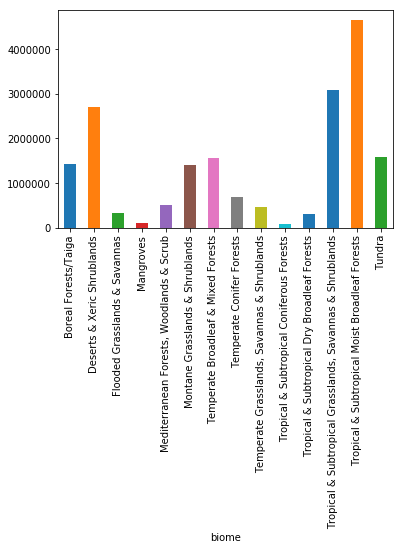

In [34]:
biome_agg.area_protected.plot.bar()

Visualise the distribution of percentage in bar chart

In [35]:
biome_agg.percent.plot.bar?

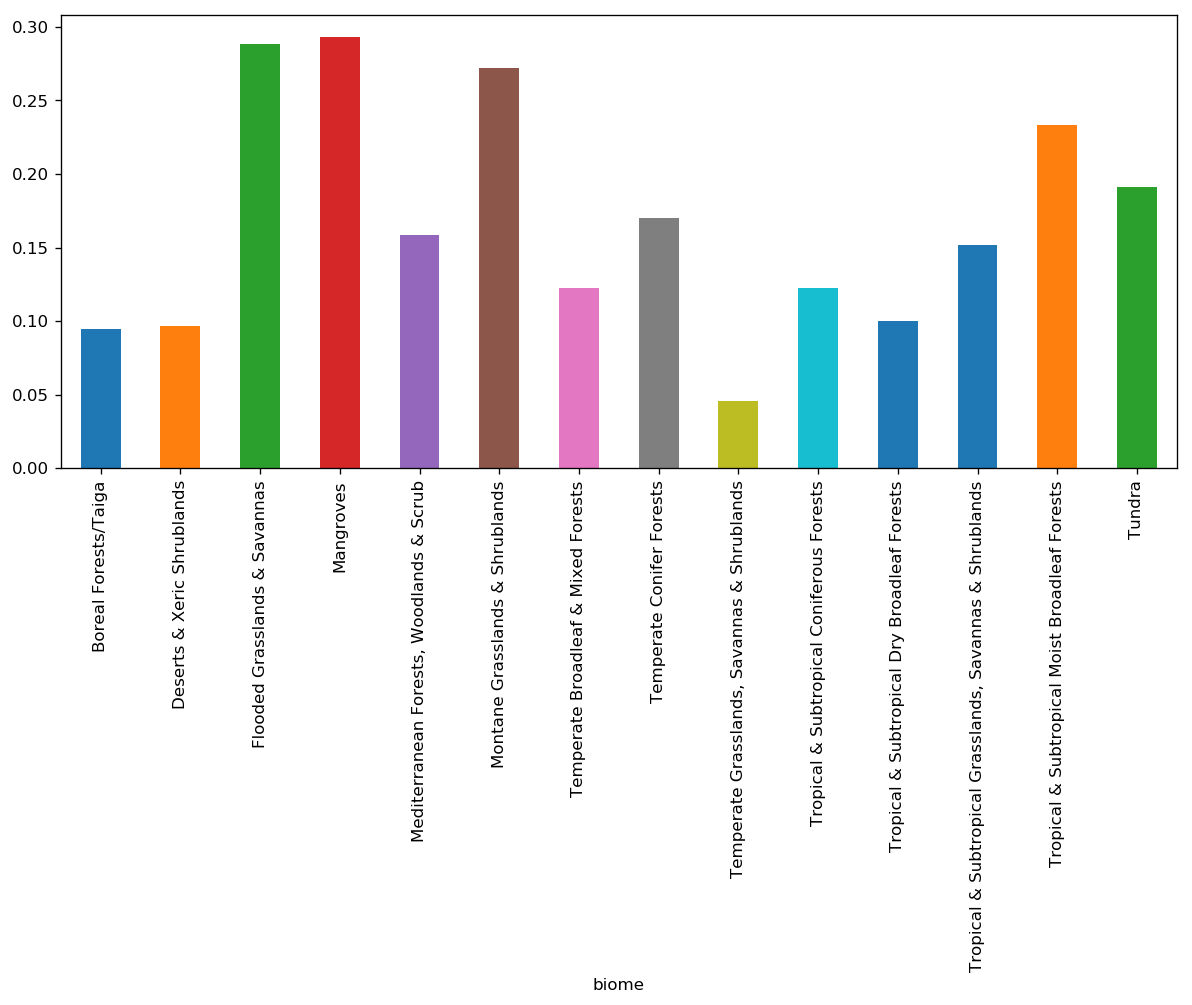

In [36]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 5), dpi=120)
biome_agg.percent.plot.bar()

Is there a relationship between the total area protected and the size of biome? Let's use the scatterplot

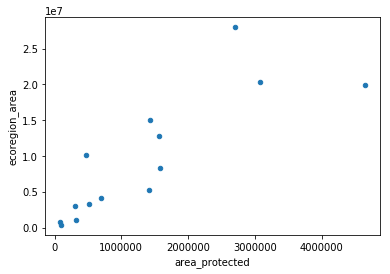

In [37]:
biome_agg.plot.scatter('area_protected', 'ecoregion_area')

More pandas dataframe plotting functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)